In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '/Users/oliverjcarter/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [28]:
### Load race and mereged DataFrames

weather = pd.read_csv(path+'data/weather.csv')

training_set = weather.query('coco.notnull()')


In [32]:
print(training_set.groupby('conditions').size())

conditions
Clear                11
Cloudy               11
Fair                 19
Fog                   3
Heavy Rain Shower     2
Light Rain            5
Overcast              5
Rain                  2
Rain Shower           2
Thunderstorm          1
dtype: int64


In [34]:
training_set.head()

,season,round,circuit_id,temp,rhum,coco,prcp,conditions
44,2016,7,villeneuve,11.40,61.0,7.0,0.0,Light Rain
57,2016,20,interlagos,18.12,89.8,7.0,0.0,Light Rain
60,2017,2,shanghai,12.75,88.0,5.0,0.0,Fog
67,2017,9,red_bull_ring,28.32,38.0,25.0,0.0,Thunderstorm
72,2017,14,marina_bay,28.00,82.8,7.0,0.0,Light Rain


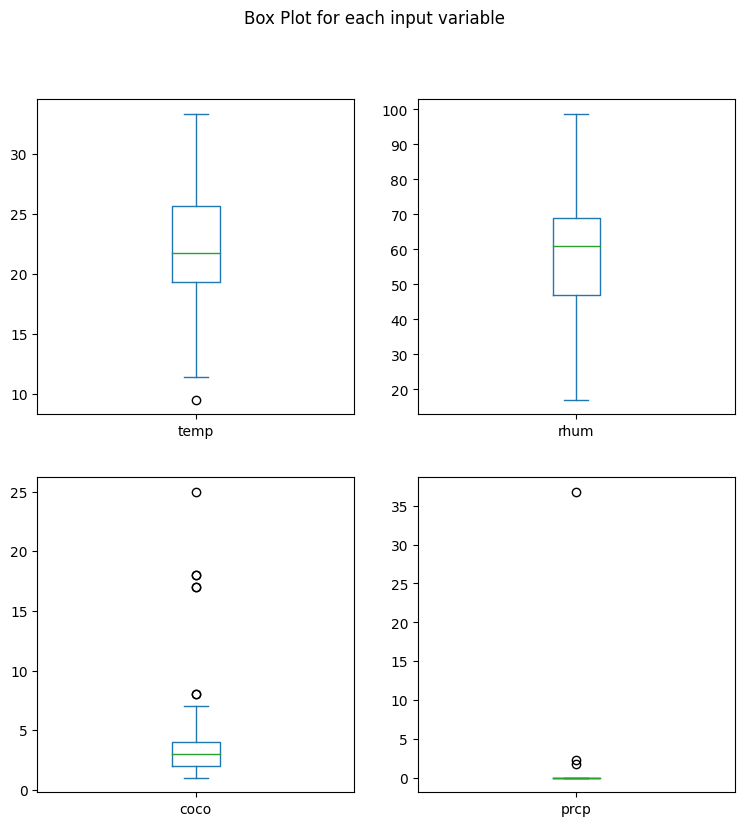

In [35]:
training_set.drop(['season', 'round', 'circuit_id'], axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.show()

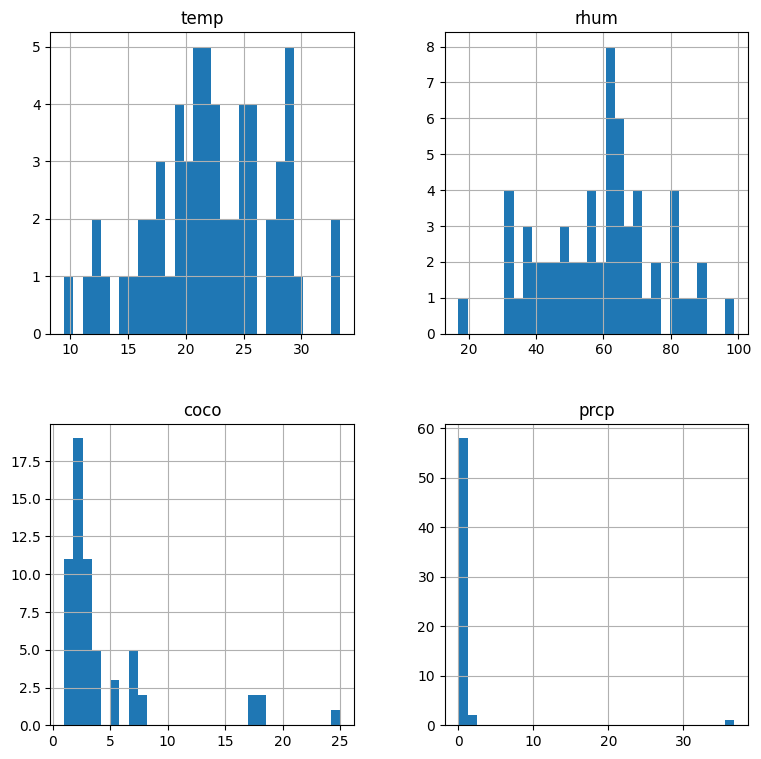

In [36]:
training_set.drop(['season', 'round', 'circuit_id'], axis=1).hist(bins=30, figsize=(9,9))
plt.show()

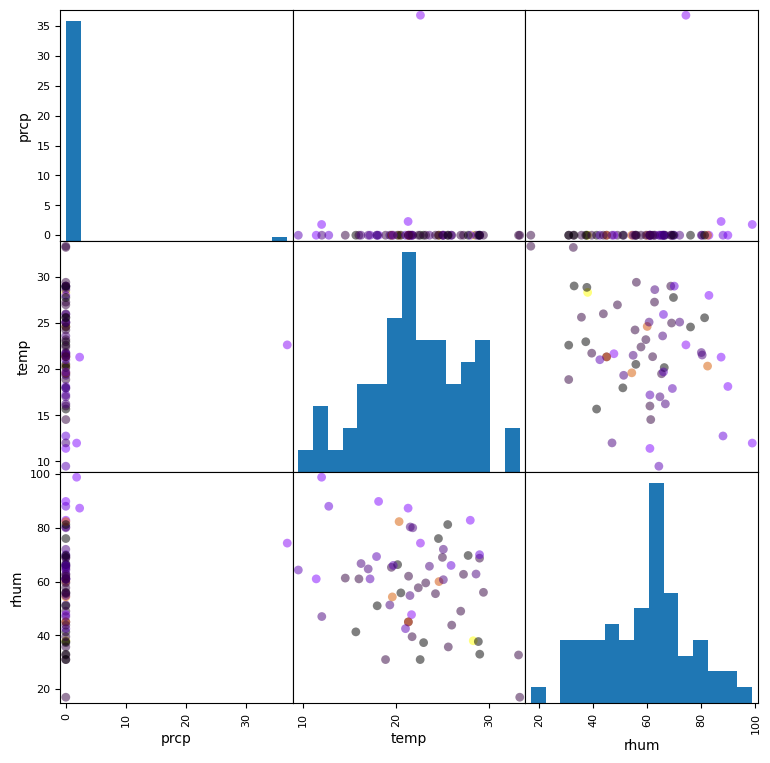

In [38]:
import pandas.plotting as pp
from matplotlib import cm

features = ['prcp', 'temp', 'rhum']
X = training_set[features]
y = training_set['coco']

cmap = cm.get_cmap('gnuplot')
scatter = pp.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)